In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
alphap = 2
probp = 0.75
expon = 2 * alphap - 1
ensemble_sizep = 100*1
min_iterationp = 100_000
bin_sizep = 0.0001

## Defining directory

In [3]:
dir_data = "../../data/alpha{}/".format(alphap)
dir_fig  ="../../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../../data/temp/alpha{}/".format(alphap)
dir_fig  ="../../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")

directory  ../../data/temp/alpha2/  exists
directory  ../../figures/temp/alpha2/  exists


In [4]:
figure_name = dir_fig + "pn_data_coll_alpha_3.pdf"

In [5]:
%run ../../stochastic_fractal_m.py

## Simulation using class

In [6]:
stochastic_frag = TrueLengths(alpha=alphap, probability=probp)

kwargs  {'alpha': 2, 'probability': 0.75}
Turning on logging


In [7]:
# lengths_enselbme = stochastic_frag.run_ensemble(ensemble_size, total_iteration)

In [8]:
ana_soln = AnalyticSoln()

## Other functions

In [9]:
def bin_maker(max_value, bin_number):
    bin_size = max_value/bin_number
    bins = [0.]
    for i in range(bin_number):
        bin_edge = (i+1)*bin_size
        bins.append(bin_edge)
        pass
    return bins

In [10]:
def histrogram_data(data, bin_size = bin_sizep):
    bin_number = int((np.max(data) - np.min(data))//bin_size) + 1
    y, x = np.histogram(data, bins = bin_number)
    return x[1:], y

## fitting data

$\phi \equiv \text{simulation}$
$\phi^{(th)} \equiv \text{theoritical or analytical}$

$$cost = \sum_t \sum_i (b*\phi_{i t} - \phi_{i t}^{(th)})^2 \$$

we need to minimize $cost$. We get the value of $b$ as

$$b = \frac{\sum_t \sum_i \phi_{i t} \phi_{i t}^{(th)}}{\sum_t \sum_i \phi_{i t}^2}$$

In [11]:
def fitting_parameter(given_array,ref_array):
    a1 = np.multiply(given_array,ref_array)
    a2 = np.multiply(given_array,given_array)
    a1_sum = np.sum(a1)
    a2_sum = np.sum(a2)
    return a1_sum, a2_sum

In [12]:
def plot_data(total_iteration):
    df = ana_soln.find_df(alphap,probp)
    
    # doing the simulation here
    ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
    x,y = histrogram_data(ens_data)
    xi = x*total_iteration**(1/(2*alphap-1))
    phi = y/(total_iteration**((1+df)/(2*alphap-1)))
    xi, phi_analytic = ana_soln.phi_list(alphap,probp,xi)  # from class
#     print(len(phi_analytic))
    a1_sum, a2_sum = fitting_parameter(phi, phi_analytic)
    print(a1_sum, ", ", a2_sum)
    return xi, phi, a1_sum, a2_sum

In [13]:
data_dict = {}
a1_sum, a2_sum = 0,0
for i in range(3):
    time_t = min_iterationp*(i+1)
    xi, phi, a1, a2 = plot_data(time_t)
    data_dict[time_t]=[xi,phi]
    a1_sum += a1
    a2_sum += a2
    
for time_t in data_dict.keys():
    data_dict[time_t][1]*=(a1_sum/a2_sum)

realization  1  . Time spent  0.15921401977539062  sec
realization  2  . Time spent  0.1738264560699463  sec
realization  3  . Time spent  0.12441802024841309  sec
realization  4  . Time spent  0.09945249557495117  sec
realization  5  . Time spent  0.09774017333984375  sec
realization  6  . Time spent  0.12033772468566895  sec
realization  7  . Time spent  0.12016797065734863  sec
realization  8  . Time spent  0.09718942642211914  sec
realization  9  . Time spent  0.11060404777526855  sec
realization  10  . Time spent  0.10044479370117188  sec
realization  11  . Time spent  0.12287497520446777  sec
realization  12  . Time spent  0.10140490531921387  sec
realization  13  . Time spent  0.1113576889038086  sec
realization  14  . Time spent  0.15409159660339355  sec
realization  15  . Time spent  0.10905146598815918  sec
realization  16  . Time spent  0.09958577156066895  sec
realization  17  . Time spent  0.10143828392028809  sec
realization  18  . Time spent  0.12283587455749512  sec
rea

realization  48  . Time spent  0.1961672306060791  sec
realization  49  . Time spent  0.19257831573486328  sec
realization  50  . Time spent  0.21544456481933594  sec
realization  51  . Time spent  0.20691323280334473  sec
realization  52  . Time spent  0.23194408416748047  sec
realization  53  . Time spent  0.21662545204162598  sec
realization  54  . Time spent  0.19696450233459473  sec
realization  55  . Time spent  0.20563721656799316  sec
realization  56  . Time spent  0.1933901309967041  sec
realization  57  . Time spent  0.21272969245910645  sec
realization  58  . Time spent  0.22349834442138672  sec
realization  59  . Time spent  0.21090078353881836  sec
realization  60  . Time spent  0.2603626251220703  sec
realization  61  . Time spent  0.19867897033691406  sec
realization  62  . Time spent  0.19709563255310059  sec
realization  63  . Time spent  0.20889067649841309  sec
realization  64  . Time spent  0.219376802444458  sec
realization  65  . Time spent  0.2312774658203125  se

realization  95  . Time spent  0.3392026424407959  sec
realization  96  . Time spent  0.3747990131378174  sec
realization  97  . Time spent  0.30167293548583984  sec
realization  98  . Time spent  0.3089621067047119  sec
realization  99  . Time spent  0.36130428314208984  sec
realization  100  . Time spent  0.41898155212402344  sec
Total time spent  34.3947958946228  sec
2.3364978953418167 ,  0.039746859077747304


In [14]:
data_dict.keys()

dict_keys([100000, 200000, 300000])

### Saving data for later use

In [15]:
signature = 'data_collapse_alpha_{}_t_{}k'
for time_t in data_dict.keys():
    x,y = data_dict[time_t]
    file_name = signature.format(alphap, int(time_t//1000))
    np.savetxt(dir_data+file_name,np.c_[x,y])

## Plotting

../../figures/temp/alpha2/pn_data_coll_alpha_3.pdf


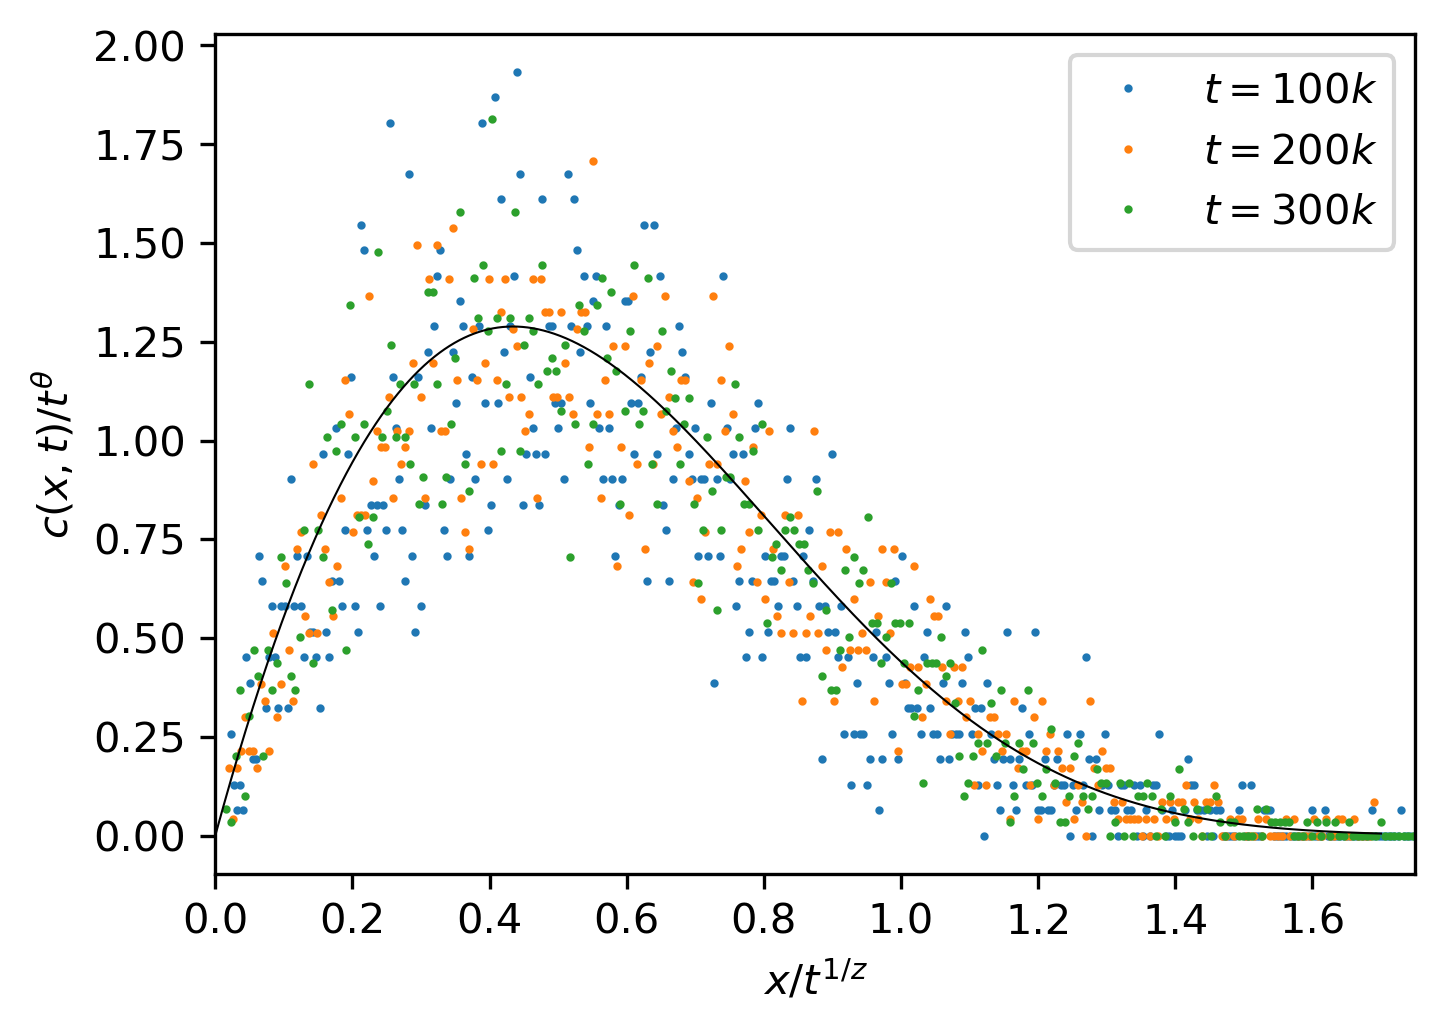

In [16]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = data_dict[time_t]
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))

xi_th = np.linspace(0,1.7,8501)
xis, phi_th = ana_soln.phi_list(alphap,probp,xi_th)  # from class
plt.plot(xi_th, phi_th,color='black',linewidth=0.5)

plt.legend(loc=1)
plt.xlabel(r"$x/t^{1/z}$")
plt.ylabel(r"$c(x,t)/t^\theta$")
plt.xlim([0, 1.75])
axes.set_position([0.15, 0.15, 0.8, 0.8])

print(figure_name)
# plt.savefig(figure_name)